In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
Ktab=pd.read_table('3C273.Kraw.tab',sep='\s+', names=['Date','JulainDate',
                                                 'mag1','merr1',
                                                 'mag2','merr2',
                                                 'mag3','merr3'], na_values=['999.000',999.000,999., '999.'])

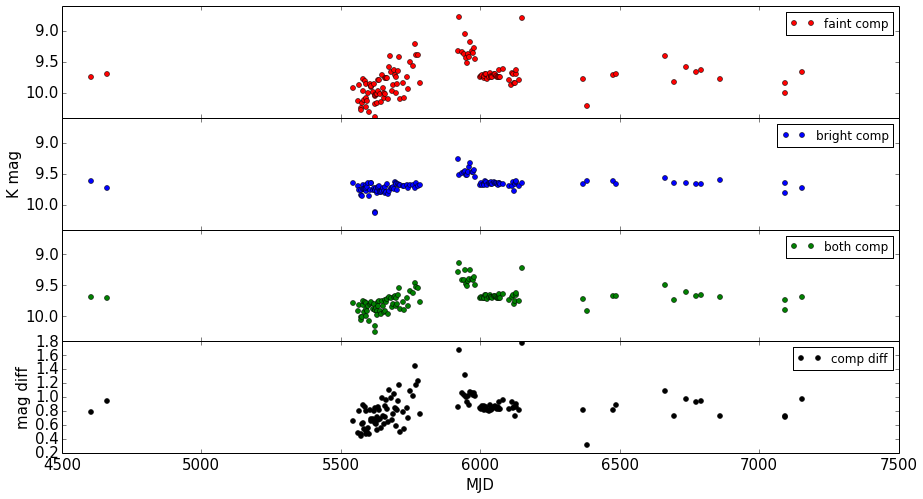

In [4]:
#find the jd range we are interested in
#Ktab=Ktab[(Ktab.JulainDate > 2455000) & (Ktab.JulainDate < 2456200)]
#calculate the calibrated magnitude with just the fainter comparison star, Cal1
#and then with just the brighter comparison star, Cal2,
#and then with both Comparison Stars, Cal3

Ktab['Cal1']= Ktab.mag1 - (Ktab.mag2 - 12.97)
Ktab['Cal2']= Ktab.mag1 - (Ktab.mag3 - 12.06)
Ktab['Cal3']= Ktab.mag1 - (Ktab.mag2 - 12.97 + Ktab.mag3 - 12.06)/2
fig=plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.001)

ax1=plt.subplot(411)
ax1.plot(Ktab.JulainDate - 2450000, Ktab.Cal1, 'ro', ms=5, label='faint comp')
ax1.invert_yaxis()
plt.legend()

ax2=plt.subplot(412, sharex=ax1, sharey=ax1)
ax2.plot(Ktab.JulainDate - 2450000, Ktab.Cal2, 'bo', ms=5, label='bright comp')
ax2.invert_yaxis()
ax2.set_ylabel('K mag')
plt.legend()

ax3=plt.subplot(413, sharex=ax1, sharey=ax1)
ax3.plot(Ktab.JulainDate - 2450000, Ktab.Cal3, 'go', ms=5, label='both comp')
ax3.invert_yaxis()
plt.legend()

ax4=plt.subplot(414, sharex=ax1)
ax4.plot(Ktab.JulainDate - 2450000, (Ktab.mag2 - Ktab.mag3), 'ko', ms=5, label='comp diff')
ax4.set_xlabel('MJD')
ax4.set_ylabel('mag diff')
plt.legend()
xticklabels = ax1.get_xticklabels()+ax2.get_xticklabels(), ax3.get_xticklabels()
plt.setp(xticklabels, visible=False)
for i in ([ax4.xaxis.label, ax4.yaxis.label, ax2.yaxis.label] + ax4.get_xticklabels() + ax4.get_yticklabels()+
          ax1.get_yticklabels() + ax2.get_yticklabels() + ax3.get_yticklabels()):
    i.set_fontsize(15)

plt.show()

In [5]:
Ktab[Ktab.Cal2 > 10.13]

,Date,JulainDate,mag1,merr1,mag2,merr2,mag3,merr3,Cal1,Cal2,Cal3
27,20110301,2455622.68326,17.762,0.011,20.353,0.099,19.684,0.055,10.379,10.138,10.2585


In [8]:
Ktab[Ktab.Cal2 < 9.26]

,Date,JulainDate,mag1,merr1,mag2,merr2,mag3,merr3,Cal1,Cal2,Cal3
70,20111224,2455920.84708,16.887,0.004,20.543,0.134,19.688,0.048,9.314,9.259,9.2865


In [18]:
Ktab.drop([27,70]).ix[:,['JulainDate','Cal2','merr3']].dropna(how='any').applymap(lambda x: '%.3f' % x).to_csv('3C273K.csv', sep=' ', index=False)

In [7]:
Jtab=pd.read_table('3C273.Jraw.tab',sep='\s+', names=['Date','JulainDate',
                                                 'mag1','merr1',
                                                 'mag2','merr2',
                                                 'mag3','merr3'], na_values=['999.000',999.000,999., '999.'])

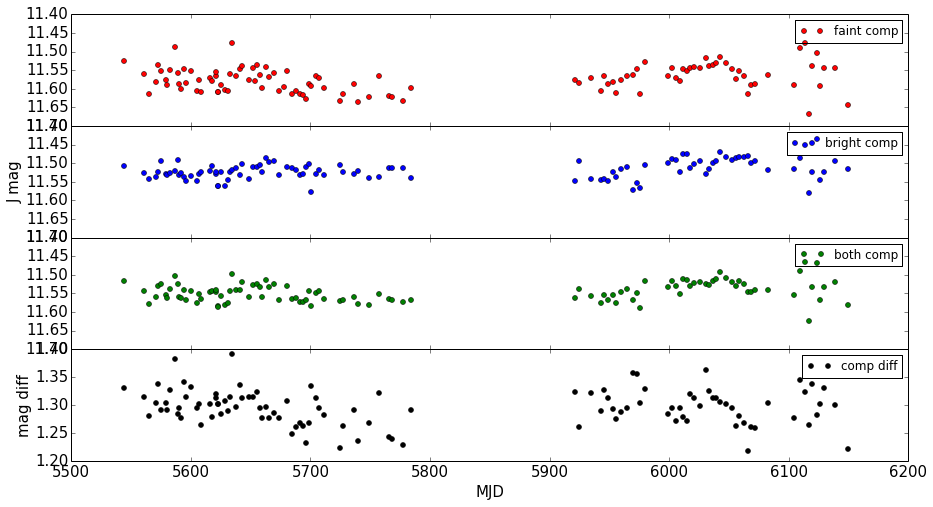

In [9]:
#find the jd range we are interested in
Jtab=Jtab[(Jtab.JulainDate > 2455500) & (Jtab.JulainDate < 2456200)]
#calculate the calibrated magnitude with just the fainter comparison star, Cal1
#and then with just the brighter comparison star, Cal2,
#and then with both Comparison Stars, Cal3

Jtab['Cal1']= Jtab.mag1 - (Jtab.mag2 - 13.64)
Jtab['Cal2']= Jtab.mag1 - (Jtab.mag3 - 12.29)
Jtab['Cal3']= Jtab.mag1 - (Jtab.mag2 - 13.64 + Jtab.mag3 - 12.29)/2
fig=plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.001)

ax1=plt.subplot(411)
ax1.plot(Jtab.JulainDate - 2450000, Jtab.Cal1, 'ro', ms=5, label='faint comp')
ax1.invert_yaxis()
plt.legend()

ax2=plt.subplot(412, sharex=ax1, sharey=ax1)
ax2.plot(Jtab.JulainDate - 2450000, Jtab.Cal2, 'bo', ms=5, label='bright comp')
ax2.invert_yaxis()
ax2.set_ylabel('J mag')
plt.legend()

ax3=plt.subplot(413, sharex=ax1, sharey=ax1)
ax3.plot(Jtab.JulainDate - 2450000, Jtab.Cal3, 'go', ms=5, label='both comp')
ax3.invert_yaxis()
plt.legend()

ax4=plt.subplot(414, sharex=ax1)
ax4.plot(Jtab.JulainDate - 2450000, (Jtab.mag2 - Jtab.mag3), 'ko', ms=5, label='comp diff')
ax4.set_xlabel('MJD')
ax4.set_ylabel('mag diff')
plt.legend()
xticklabels = ax1.get_xticklabels()+ax2.get_xticklabels(), ax3.get_xticklabels()
plt.setp(xticklabels, visible=False)
for i in ([ax4.xaxis.label, ax4.yaxis.label, ax2.yaxis.label] + ax4.get_xticklabels() + ax4.get_yticklabels()+
          ax1.get_yticklabels() + ax2.get_yticklabels() + ax3.get_yticklabels()):
    i.set_fontsize(15)

plt.show()

In [11]:
Jtab[Jtab.Date == 20110301]

,Date,JulainDate,mag1,merr1,mag2,merr2,mag3,merr3,Cal1,Cal2,Cal3
218,20110301,2455622.68535,18.377,0.004,20.408,0.018,19.107,0.007,11.609,11.560,11.5845
219,20110301,2455622.68535,18.378,0.004,20.408,0.018,19.106,0.007,11.610,11.562,11.5860


In [13]:
Jtab.Cal2.max()

11.580999999999996